## cProfile* (Function Profiler)

**cProfile** is a C extension with reasonable overhead that makes it suitable for profiling long-running programs. No code modification is required to use this profiler. It provides a call stack graph and execution time of functions that help identify hotspots. It does not profile GPU workloads. It cannot profile individual threads. It does not provide memory consumption information. <br>
Python includes **cProfile** as a built-in module. The cProfiler module provides all information about how long the program is executing and how many times the function gets called in a program.
If you want to know more about this profiler visit the **[Python official documentation](https://docs.python.org/3/library/profile.html)** 

### To Install cProfile
No specific installation is required because it comes **in-built** with **Python.** <br>
To visualize results after profiling, we need **Snakeviz and gprof2dot.** <br>
**Using pip** <br>
**To install Snakeviz** <br>
`pip install snakeviz` <br>
To know more about **Snakeviz** visit **[official documentation](https://jiffyclub.github.io/snakeviz/)** <br>

**To install gprof2dot** <br>
Install the requirements **grpahviz** and **eog** first <br>
`apt-get install python3 graphviz` <br>
`apt install eog` <br>
and then install **gprof2dot** <br>
`pip install gprof2dot --user` <br>
To know more about **gprof2dot** visit **[official documentation](https://github.com/jrfonseca/gprof2dot)** <br>

### Ways to Profile Python Code using cProfiler
- **1. Using cProfile in the python code:** Code modification is required to use this way of profiling. You can selectively choose what functions to profile.
- **2. Using cProfile in command line to profile python script:** No code modification is required to use this way of profiling. It profiles the whole python script.

### 1. Using cProfile in the python code:

Create a python file **example1.py**  and **uncomment** the code. We have already created one for your reference, so you are free to skip this step. Note the comments in the code explaining how cProfile is implemented.

In [3]:
# import time
# import numpy as np
# import cProfile

# def very_slow_random_generator():   ##Function to generate random number
#     time.sleep(5)                   ##Added 5secs sleep to simulate very slow generator
#     arr1 = np.random.randint(1,100, size=(1000,1000))
#     avg = arr1.mean()
#     return avg


# def slow_random_generator():       ##Function to generate random number
#     time.sleep(2)                  ##Added 2secs sleep to simulate very slow generator
#     arr1 = np.random.randint(1,100, size=(1000,1000))
#     avg = arr1.mean()
#     return avg

# prof = cProfile.Profile()    #Create  a cProfile Object

# def main_func():
#     prof.enable()           ##Enable profiling from this line
#     avg1 = slow_random_generator()
#     avg2 = very_slow_random_generator()
#     prof.disable()         ##Disable profiling after this line
#     print("Averages: {:.3f}, {:.3f}".format(avg1,avg2))

# if __name__ == '__main__':
#     main_func()
#     prof.print_stats()     ##Print Profiling results

To profile the **example1.py** file using **cProfile** execute the below line

In [4]:
!python example1.py

Averages: 50.004, 49.980
         47 function calls in 7.053 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.003    0.001 <__array_function__ internals>:2(prod)
        2    0.000    0.000    0.000    0.000 _asarray.py:110(asanyarray)
        2    0.000    0.000    0.004    0.002 _methods.py:161(_mean)
        2    0.000    0.000    0.000    0.000 _methods.py:65(_count_reduce_items)
        1    0.000    0.000    2.026    2.026 example1.py:12(slow_random_generator)
        1    0.000    0.000    5.027    5.027 example1.py:5(very_slow_random_generator)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:2907(_prod_dispatcher)
        2    0.000    0.000    0.003    0.001 fromnumeric.py:2912(prod)
        2    0.000    0.000    0.003    0.001 fromnumeric.py:70(_wrapreduction)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:71(<dictcomp>)
        2    0.000    0.000    0.0

As it can be seen above, the results include the **execution time of different functions.** <br>
The result has 6 columns in the table, explained below:

- **ncalls:** It represents a number of times that function was called. It can have two numbers separated by a slash in case of recursive calls. The first number, in that case, represents total calls including recursive calls and the second number represents primitive calls excluding recursive calls. <br>
- **tottime:** It represents total time spent in that function excluding time spent in sub-functions of that function. <br>
- **percall:** It represents tottime divided by ncalls. <br>
- **cumtime:** It represents total time spent in that function including time-spent in sub-functions of that function. <br>
- **percall:** It represents cumtime divided by ncalls. <br>
- **filename:lineno(function):** It represents filename, line number in file and function name. <br>

If you want to know more about **cProfile [visit official documentation.](https://docs.python.org/3/library/profile.html)** 

### 2. Using cProfile in command line to profile python script

Create a python file **example.py**  and **uncomment** the code. We have already created one for your reference, so you are free to skip this step.

In [1]:
# import time
# import numpy as np

# def very_slow_random_generator():        ##Function to generate random number
#     time.sleep(5)                        ##Added 5 secs sleep to simulate very slow generator
#     arr1 = np.random.randint(1,100, size=(1000,1000))
#     avg = arr1.mean()
#     return avg


# def slow_random_generator():             ##Function to generate random number
#     time.sleep(2)                        ##Added 2 secs sleep to simulate very slow generator
#     arr1 = np.random.randint(1,100, size=(1000,1000))
#     avg = arr1.mean()
#     return avg

# def main_func():
#     avg1 = slow_random_generator()
#     avg2 = very_slow_random_generator()

#     print("Averages: {:.3f}, {:.3f}".format(avg1,avg2))

# if __name__ == '__main__':
#     main_func()

To profile the **example.py** file using **cProfile** execute the below line

In [2]:
!python -m cProfile -o example_output.prof example.py

Averages: 49.971, 50.028


#### Load Profiling Results From File using "pstats"

We can print the outputted profiling results by converting it to a Stats object and calling the **print_stats()** method on it. The `print_stats()` method accepts a list of arguments that can be used to filter results. For example -

In [4]:
import pstats
p = pstats.Stats("example_output.prof")
p.print_stats(10)

Tue May  2 13:44:00 2023    example_output.prof

         83176 function calls (81130 primitive calls) in 7.530 seconds

   Random listing order was used
   List reduced from 936 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  220/219    0.006    0.000    0.008    0.000 {built-in method builtins.__build_class__}
    365/8    0.001    0.000    0.380    0.047 {built-in method builtins.__import__}
       96    0.000    0.000    0.000    0.000 {built-in method builtins.abs}
        5    0.000    0.000    0.000    0.000 {built-in method builtins.any}
        3    0.000    0.000    0.000    0.000 {built-in method builtins.callable}
      288    0.000    0.000    0.000    0.000 {built-in method builtins.chr}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.dir}
       60    0.000    0.000    0.000    0.000 {built-in method builtins.divmod}
        7    0.001    0.000    0.001    0.000 {built-in method builtins.eva

The result has 6 columns in the table, explained below:

- **ncalls:** It represents a number of times that function was called. It can have two numbers separated by a slash in case of recursive calls. The first number, in that case, represents total calls including recursive calls and the second number represents primitive calls excluding recursive calls. <br>
- **tottime:** It represents total time spent in that function excluding time spent in sub-functions of that function. <br>
- **percall:** It represents tottime divided by ncalls. <br>
- **cumtime:** It represents total time spent in that function including time-spent in sub-functions of that function. <br>
- **percall:** It represents cumtime divided by ncalls. <br>
- **filename:lineno(function):** It represents filename, line number in file and function name. <br>

If you want to know more about **cProfile [visit official documentation](https://docs.python.org/3/library/profile.html)** 

#### Customize **pstats** 

To understand and manipulate the results, **pstats** can be customized to sort the results by different columns.

##### To Sort Profiling Results According to Multiple Columns

Below we are sorting the results based on **total time (tottime -> pstats.SortKey.TIME)** and **cummulative time (cumtime -> pstats.SortKey.CUMULATIVE).** <br>
**.print_stats(10)** is used to print **top 10** results after sorting 

In [5]:
p.sort_stats(pstats.SortKey.TIME, pstats.SortKey.CUMULATIVE).print_stats(10);

Tue May  2 13:44:00 2023    example_output.prof

         83176 function calls (81130 primitive calls) in 7.530 seconds

   Ordered by: internal time, cumulative time
   List reduced from 936 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    7.007    3.504    7.007    3.504 {built-in method time.sleep}
      116    0.136    0.001    0.136    0.001 {built-in method io.open_code}
      762    0.076    0.000    0.076    0.000 {built-in method posix.stat}
        2    0.050    0.025    0.050    0.025 {method 'randint' of 'numpy.random.mtrand.RandomState' objects}
        1    0.043    0.043    0.043    0.043 {method 'dot' of 'numpy.ndarray' objects}
    33/31    0.037    0.001    0.041    0.001 {built-in method _imp.create_dynamic}
      116    0.023    0.000    0.023    0.000 {built-in method marshal.loads}
      116    0.022    0.000    0.022    0.000 {method '__exit__' of '_io._IOBase' objects}
      417    0.006    0.000

##### To Filter Entries Of Profiling Results using Pattern

Below we are filtering the results based on **some pattern in code.** In this case, we are using **print_stats** to print results that include keyword **sleep.**

In [6]:
p.print_stats("sleep");

Tue May  2 13:44:00 2023    example_output.prof

         83176 function calls (81130 primitive calls) in 7.530 seconds

   Ordered by: internal time, cumulative time
   List reduced from 936 to 1 due to restriction <'sleep'>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    7.007    3.504    7.007    3.504 {built-in method time.sleep}




##### To Reverse Order of Profiling Results using **reverse_order()**

Below we are sorting the results based on **cummulative time (cumtime -> pstats.SortKey.CUMULATIVE)** and using **reverse_order()** to reverse the order of results and then we print **top 10** results.

In [8]:
p.sort_stats(pstats.SortKey.CUMULATIVE).reverse_order().print_stats(10);

Tue May  2 13:44:00 2023    example_output.prof

         83176 function calls (81130 primitive calls) in 7.530 seconds

   Ordered by: cumulative time
   List reduced from 936 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:782(is_package)
        1    0.000    0.000    0.000    0.000 /glob/development-tools/versions/oneapi/2023.0.1/oneapi/intelpython/latest/lib/python3.9/pickle.py:84(UnpicklingError)
        1    0.000    0.000    0.000    0.000 {method '__exit__' of '_thread.RLock' objects}
        1    0.000    0.000    0.000    0.000 {method '__enter__' of '_thread.lock' objects}
        1    0.000    0.000    0.000    0.000 /glob/development-tools/versions/oneapi/2023.0.1/oneapi/intelpython/latest/lib/python3.9/threading.py:750(BrokenBarrierError)
        1    0.000    0.000    0.000    0.000 /glob/development-tools/versions/oneapi/2023.0.1/oneapi/int

##### To Print Callers and Callees Functions in Profiling Results (**print_callers()** & **print_callees()**)

**Note**: The **strip_dirs()** removes the full path and show just function without it's location, it is preferred to use this if you want to remove redudant information. <br>
The **print_callers** function prints different parent functions that make call to sub-functions. In this case we are printing **top 5** results from **print_callers**

In [9]:
p.strip_dirs().reverse_order().print_callers(5);

   Random listing order was used
   List reduced from 918 to 5 due to restriction <5>

Function                                    was called by...
                                                ncalls  tottime  cumtime
{built-in method builtins.__build_class__}  <-       1    0.000    0.000  __future__.py:1(<module>)
                                                    21    0.001    0.001  __init__.py:1(<module>)
                                                     1    0.000    0.000  __init__.py:26(<module>)
                                                     2    0.000    0.000  __init__.py:76(CFUNCTYPE)
                                                     1    0.000    0.000  __init__.py:340(__init__)
                                                     3    0.000    0.000  __init__.py:509(PYFUNCTYPE)
                                                     3    0.000    0.000  _datasource.py:1(<module>)
                                                     2    0.000    0.000  _endi

The **print_callees** function prints different sub-functions that are being called by parent functions. In this case we are printing **top 5** results from **print_callees**.

In [11]:
p.strip_dirs().print_callees(4);

   Random listing order was used
   List reduced from 918 to 4 due to restriction <4>

Function                                    called...
                                                ncalls  tottime  cumtime
{built-in method builtins.__build_class__}  ->       1    0.000    0.000  __future__.py:81(_Feature)
                                                     1    0.000    0.000  __init__.py:28(RTLD_for_MKL)
                                                     2    0.000    0.000  __init__.py:102(CFunctionType)
                                                     1    0.000    0.000  __init__.py:154(py_object)
                                                     1    0.000    0.000  __init__.py:163(c_short)
                                                     1    0.000    0.000  __init__.py:167(c_ushort)
                                                     1    0.000    0.000  __init__.py:171(c_long)
                                                     1    0.000    0.000  __ini

### Example on how to use **cProfile** for **Intelligent Indexing** ref kit 

The **[Intelligent Indexing](https://github.com/oneapi-src/intelligent-indexing)** ref kit demonstrates one way of building an NLP pipeline for classifying documents to their respective topics and describe how we can leverage the **Intel® AI Analytics Toolkit (AI Kit)** to accelerate the pipeline.

**Intel® AI Analytics Toolkit (AI Kit)** is used to achieve quick results even when the data for a model are huge. It provides the capability to reuse the code present in different languages so that the hardware utilization is optimized to provide these results.

The **Intelligent Indexing** ref kit has different Intel® oneAPI optimizations enabled like:
- **[Intel® Distribution of Modin*](https://www.intel.com/content/www/us/en/developer/tools/oneapi/distribution-of-modin.html#gs.v03x2l)**
The Intel® Distribution of Modin* is a performant, parallel, and distributed dataframe system that is designed around enabling data scientists to be more productive. It provides drop-in acceleration to your existing **pandas** workflows. No upfront cost to learning a new API. Integrates with the Python* ecosystem. Seamlessly scales across multicores with Ray* and Dask* clusters (run on and with what you have)
- **[Intel® Extension for Scikit-learn*](https://www.intel.com/content/www/us/en/developer/tools/oneapi/scikit-learn.html)**
Designed for data scientists, Intel® Extension for Scikit-Learn* is a seamless way to speed up your Scikit-learn applications for machine learning to solve real-world problems. This extension package dynamically patches scikit-learn estimators to use Intel® oneAPI Data Analytics Library (oneDAL) as the underlying solver, while achieving the speed up for your machine learning algorithms out-of-box.

**NOTE** Please visit the **[Intelligent Indexing](https://github.com/oneapi-src/intelligent-indexing)** Ref kit page to know more about the kit.
- Please follow the steps in github repo to clone and create the environment.

**We will be using cProfile to profile this workload below.**

#### Profile the Intelligent Indexing Ref Kit with Stock packages

To ignore warnings run the below cell and if the result directories are not present uncomment the below code

In [4]:
import warnings
warnings.filterwarnings('ignore')
# mkdir -p cProfile_results  # create `cProfile_results` dir in the parent dir if not present
# mkdir -p cProfile_results/stock_results  # create `stock_results` dir in the cProfile_results if not present
# mkdir -p cProfile_results/oneapi_optimized_results  # create `oneapi_optimized_results` dir in the cProfile_results if not present

To run the profiler on the intelligent indexing ref kit <br>
1. Navigate to directory **intelligent-indexing/src/** in terminal <br>
`conda activate doc_class_stock` <br>
2. Install snakeviz if you have not already installed it. <br>
`pip install snakeviz` <br>

Execute the below command in Terminal:

`python -m cProfile -o ../../Profiling_Guide/cProfile_Profiler/cProfile_results/stock_results/cProfile_stock.prof run_benchmarks.py -l ../logs/stock_stock.log`

**To visualize the results use Snakeviz** <br>
- **-h**: show this help message and exit <br>
- **-v**: show program's version number and exit <br>
- **-H**: hostname to bind to (default: 127.0.0.1) <br>
- **-p**: port to bind to; port will be selected automatically (default: 8080) <br>
- **-b**: name of webbrowser to launch as described in the [documentation](https://docs.python.org/3/library/webbrowser.html) <br>
- **-s**: start SnakeViz in server-only mode--no attempt will be made to open a browser <br>

**To know more about Snakeviz visit this [documentation](https://jiffyclub.github.io/snakeviz/)** <br>
Use the below command on the CLI terminal to visualize the saved results: <br>
**Note:** If you are on a **remote server** use **-s** flag to launch snakeviz in server-only mode.

`snakeviz '../../Profiling_Guide/cProfile_Profiler/cProfile_results/stock_results/cProfile_stock.prof'`

**Interpreting Results** <br>
SnakeViz has two visualization styles, **icicle** (the default) and **sunburst**. In both the fraction of time spent in a function is represented by the extent of a visualization element, either the width of a rectangle or the angular extent of an arc. You can switch between the two styles using the “Style” dropdown. (See more below under Controls.)

Functions don’t only spend time calling other functions, they also have their own internal time. SnakeViz shows this by putting a special child on each node that represents internal time. Only functions that call other functions will have this, functions with no calls are entirely internal time.

- **Icicle** <br>
In the icicle visualization style functions are represented by rectangles. A root function is the top-most rectangle, with its child functions it calls below it, then the functions those call below them, and so on. The amount of time spent inside a function is represented by the width of the rectangle. A rectangle that stretches across most of the visualization represents a function that is taking up most of the time of its calling function, while a skinny rectangle represents a function that is using hardly any time at all.
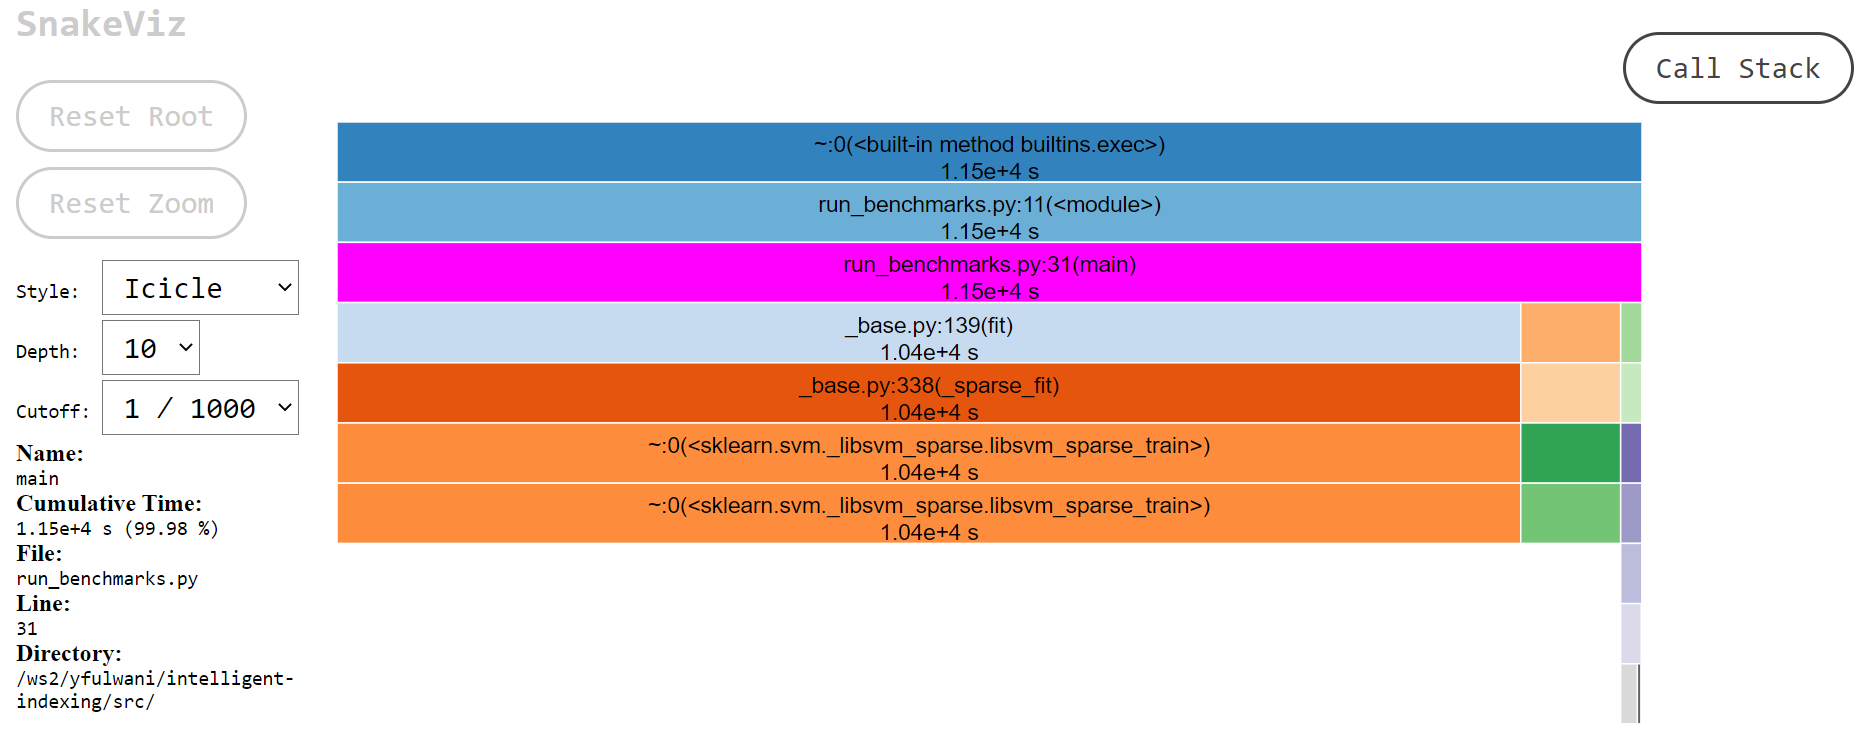 <br>

- **Sunburst** <br>
In the sunburst visualization style functions are represented as arcs. A root function is a circle at the middle, with functions it calls around, then the functions those functions call, and so on. The amount of time spent inside a function is represented by the angular extent of the arc (how far around the circle it goes). An arc that wraps most of the way around the circle represents a function that is taking up most of the time of its calling function, while a skinny arc represents a function that is using hardly any time at all.
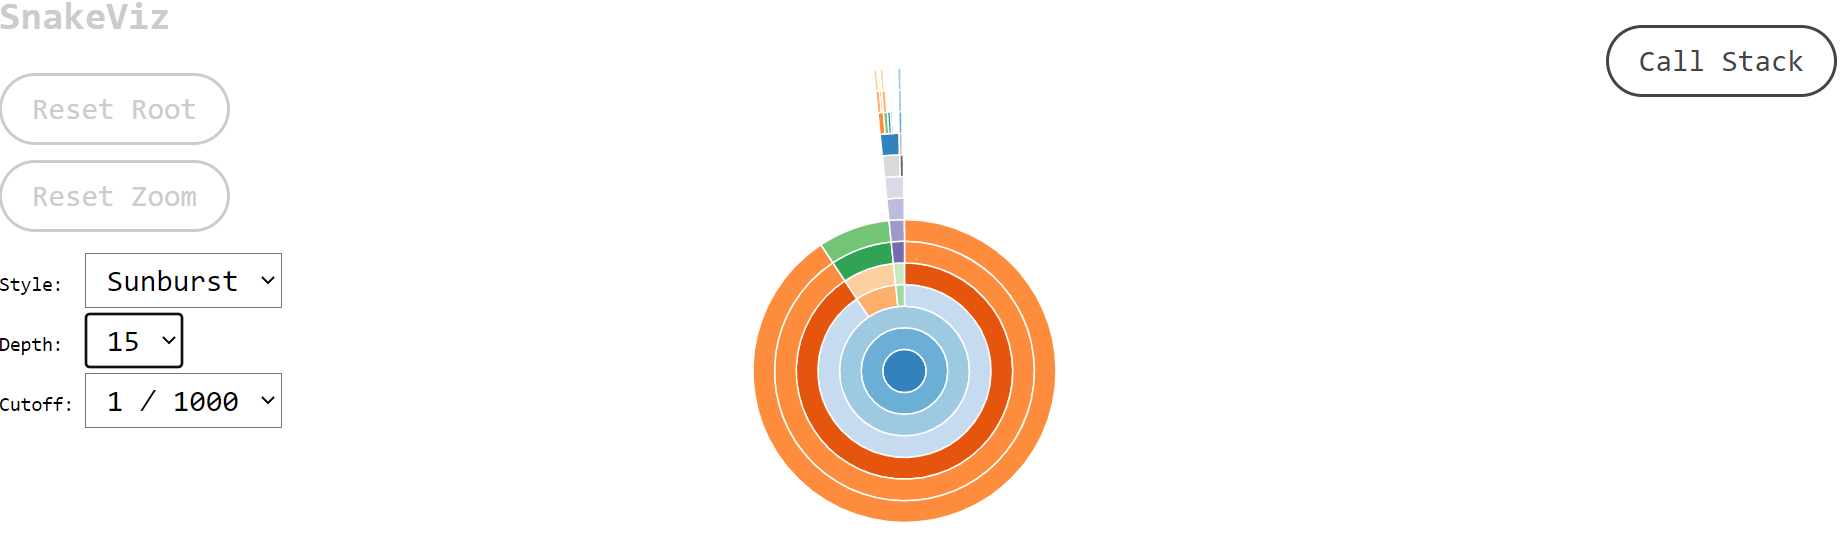 <br>

The displayed information includes:

- **Name**: function name
- **Cumulative Time**: total cumulative amount of time spent in the function in seconds and as a percentage of the total program run time
- **File**: name of the file in which the function is defined
- **Line**: line number on which the function is defined
- **Directory**: directory of the file

To know more about Snakeviz visit the [snakeviz documentation](https://jiffyclub.github.io/snakeviz/) <br>

#### More ways to visualize CProfile Using **[gprof2dot](https://github.com/jrfonseca/gprof2dot) in `doc_class_stock` env**

To run the profiler on the intelligent indexing ref kit <br>
1. Navigate to directory **intelligent-indexing/src/** in terminal <br>
`conda activate doc_class_stock` <br>
2. Install gprof2dot if you have not already installed it. <br>
`pip install gprof2dot --user`

Execute the below command in Terminal:

`python -m cProfile -o ../../Profiling_Guide/cProfile_Profiler/cProfile_results/stock_results/cProfile_stock.pstats run_benchmarks.py -l ../logs/stock_stock.log`

Use the command below in Terminal to generate a **call graph** image 

`gprof2dot -f pstats '../../Profiling_Guide/cProfile_Profiler/cProfile_results/stock_results/cProfile_stock.pstats' | dot -Tpng -o '../../Profiling_Guide/cProfile_Profiler/cProfile_results/stock_results/stock_output.png' && eog '../../Profiling_Guide/cProfile_Profiler/cProfile_results/stock_results/stock_output.png'`

#### Profile Intelligent Indexing Ref Kit with Intel oneAPI optimized packages

To run the profiler on the intelligent indexing ref kit <br>
1. Navigate to directory **intelligent-indexing/src/** in terminal <br>
`conda activate doc_class_intel` <br>
2. Install snakeviz if you have not already installed it. <br>
`pip install snakeviz` <br>

Execute the below command in Terminal:

`python -m cProfile -o ../../Profiling_Guide/cProfile_Profiler/cProfile_results/oneapi_optimized_results/cProfile_intel.prof run_benchmarks.py -i -l ../logs/intel_intel.log`

**To visualize the results use Snakeviz** <br>
Use the below command on the CLI terminal to visualize the saved results: <br>
**Note:** If you are on a **remote server** use **-s** flag to launch snakeviz in server-only mode.

`snakeviz '../../Profiling_Guide/cProfile_Profiler/cProfile_results/oneapi_optimized_results/cProfile_intel.prof'`

**Interpreting Results** <br>
You can use [snakeviz](https://jiffyclub.github.io/snakeviz/) to interpret the results as shown above.

#### More ways to visualize CProfile Using **[gprof2dot](https://github.com/jrfonseca/gprof2dot) in `doc_class_intel` env**

To run the profiler on the intelligent indexing ref kit <br>
1. Navigate to directory **intelligent-indexing/src/** in terminal <br>
`conda activate doc_class_intel`
2. Install gprof2dot if you have not already installed it. <br>
`pip install gprof2dot --user`

Execute the below command in Terminal:

`python -m cProfile -o ../../Profiling_Guide/cProfile_Profiler/cProfile_results/oneapi_optimized_results/cProfile_intel.pstats run_benchmarks.py -i -l ../logs/intel_intel.log`

Use the command below in Terminal to generate a **call graph** image 

`gprof2dot -f pstats '../../Profiling_Guide/cProfile_Profiler/cProfile_results/oneapi_optimized_results/cProfile_intel.pstats' | dot -Tpng -o '../../Profiling_Guide/cProfile_Profiler/cProfile_results/oneapi_optimized_results/intel_output.png' && eog '../../Profiling_Guide/cProfile_Profiler/cProfile_results/oneapi_optimized_results/intel_output.png'`

After the image is generated you can **download** to view it.